In [5]:
import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
pd.set_option('precision',2)
pd.options.display.max_columns = 30

import warnings
warnings.filterwarnings("ignore")

OptionError: Pattern matched multiple keys

In [7]:
print("Complete")

Complete


In [8]:
df = pd.read_csv(r'D:\downloads\all_seasons_nba.csv')
df.head()

Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0  ...  5.7  16.1  3.1        16.1     0.186     0.323    0.100   0.479   
1  ...  2.3   1.5  0.3        12.3     0.078     0.151    0.175   0.430   
2  ...  0.8   1.0  0.4        -2.1     0.105     0.102    0.103   0.376   
3  ...  3.7   2.3  0.6        -8.7     0.060     0.149    0.167   0.399   
4  ...  2.4   2.4  0.2       -11.2     0.109     0.179    0.127   0.611   

   ast_pct   season  
0    0.113  1996-97  
1    0.048  1996-97  
2    0.148  1996-97  
3    0.077  1996-97  
4    0.040  1996-97  

[5 rows x 22 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [10]:
df['drafted'] = df['draft_year'].notna().map({True: 'yes', False: 'no'})
df['draft_year'] = df['draft_year'].fillna(-1).astype(int)
df['season'] = df['season'].astype(int)

ValueError: invalid literal for int() with base 10: 'Undrafted'

In [ ]:
df.info()

In [11]:
df.describe()

Unnamed: 0           age  player_height  player_weight            gp  \
count  12305.000000  12305.000000   12305.000000   12305.000000  12305.000000   
mean    6152.000000     27.084518     200.611602     100.369926     51.290532   
std     3552.291866      4.335868       9.146321      12.477150     25.095909   
min        0.000000     18.000000     160.020000      60.327736      1.000000   
25%     3076.000000     24.000000     193.040000      90.718400     31.000000   
50%     6152.000000     26.000000     200.660000      99.790240     57.000000   
75%     9228.000000     30.000000     208.280000     108.862080     73.000000   
max    12304.000000     44.000000     231.140000     163.293120     85.000000   

                pts           reb           ast    net_rating      oreb_pct  \
count  12305.000000  12305.000000  12305.000000  12305.000000  12305.000000   
mean       8.172775      3.559155      1.813986     -2.255733      0.054473   
std        5.974957      2.483550      1.794155     12.673254      0.043599   
min        0.000000      0.000000      0.000000   -250.000000      0.000000   
25%        3.600000      1.800000      0.600000     -6.400000      0.021000   
50%        6.700000      3.000000      1.200000     -1.300000      0.041000   
75%       11.500000      4.700000      2.400000      3.200000      0.084000   
max       36.100000     16.300000     11.700000    300.000000      1.000000   

           dreb_pct       usg_pct        ts_pct       ast_pct  
count  12305.000000  12305.000000  12305.000000  12305.000000  
mean       0.141014      0.184891      0.511060      0.131358  
std        0.062704      0.053390      0.101163      0.094483  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.096000      0.149000      0.480000      0.066000  
50%        0.131000      0.181000      0.524000      0.103000  
75%        0.180000      0.217000      0.561000      0.178000  
max        1.000000      1.000000      1.500000      1.000000

In [12]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

player_name team_abbreviation college country draft_year draft_round  \
count          12305             12305   12305   12305      12305       12305   
unique          2463                36     347      82         47           9   
top     Vince Carter               CLE    None     USA  Undrafted           1   
freq              22               433    1789   10308       2224        7071   

       draft_number   season drafted  
count         12305    12305   12305  
unique           76       26       1  
top       Undrafted  2021-22     yes  
freq           2277      605   12305

In [13]:
main_variables = df.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})

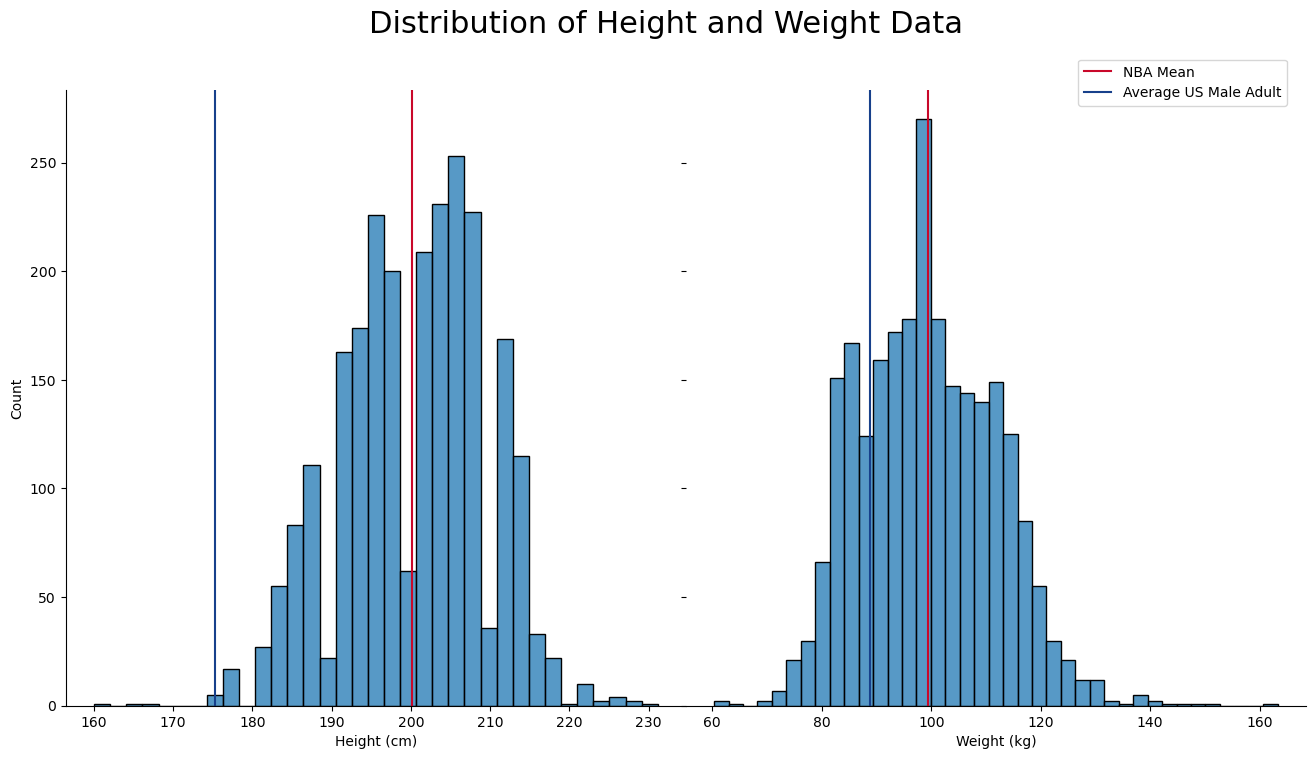

In [14]:
fig, ax = plt.subplots(1,2,figsize=(16, 8),sharey=True)
plt.subplots_adjust(wspace=0)

sns.histplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.histplot(main_variables ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(main_variables ['player_height'].mean(), color='#c9082a', label='NBA Mean')
ax[1].axvline(main_variables ['player_weight'].mean(), color='#c9082a', label='NBA Mean')


ax[0].axvline(175.3, color='#17408b', label='Average US Male Adult')
ax[1].axvline(88.8, color='#17408b', label='Average US Male Adult')

ax[0].yaxis.set_label_text('Count')
ax[0].xaxis.set_label_text('Height (cm)')
ax[1].xaxis.set_label_text('Weight (kg)')
plt.suptitle('Distribution of Height and Weight Data', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=True)
sns.despine(ax=ax[0])
sns.despine(ax=ax[1], left=True)

plt.show()

In [15]:
fig = go.Figure(data=go.Scatter(x=main_variables['player_weight'],
                                y=main_variables['player_height'],
                                mode='markers',
                                text=main_variables['player_name'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='NBA Player Height and Weight (for interactive exploration)',
    xaxis_title='Weight (kg)',
    yaxis_title='Height (cm)',
    plot_bgcolor='rgba(0,0,0,0)',
    
)
fig.show()

In [16]:
corr = stats.pearsonr(main_variables['player_height'], main_variables['player_weight'])
print(corr)

PearsonRResult(statistic=0.8210705060051053, pvalue=0.0)


In [17]:
corr_over_seasons = df.groupby('season')[['player_weight','player_height']].corr().unstack().iloc[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=corr_over_seasons.index, 
                         y=corr_over_seasons.values,
                         mode='lines',
                         name='lines',
                         line=dict(color='#17408b')
                        ))

fig.update_layout(
    title='NBA Player Height and Weight Correlation Each Season',
    xaxis_title='Season',
    yaxis_title='Correlation',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

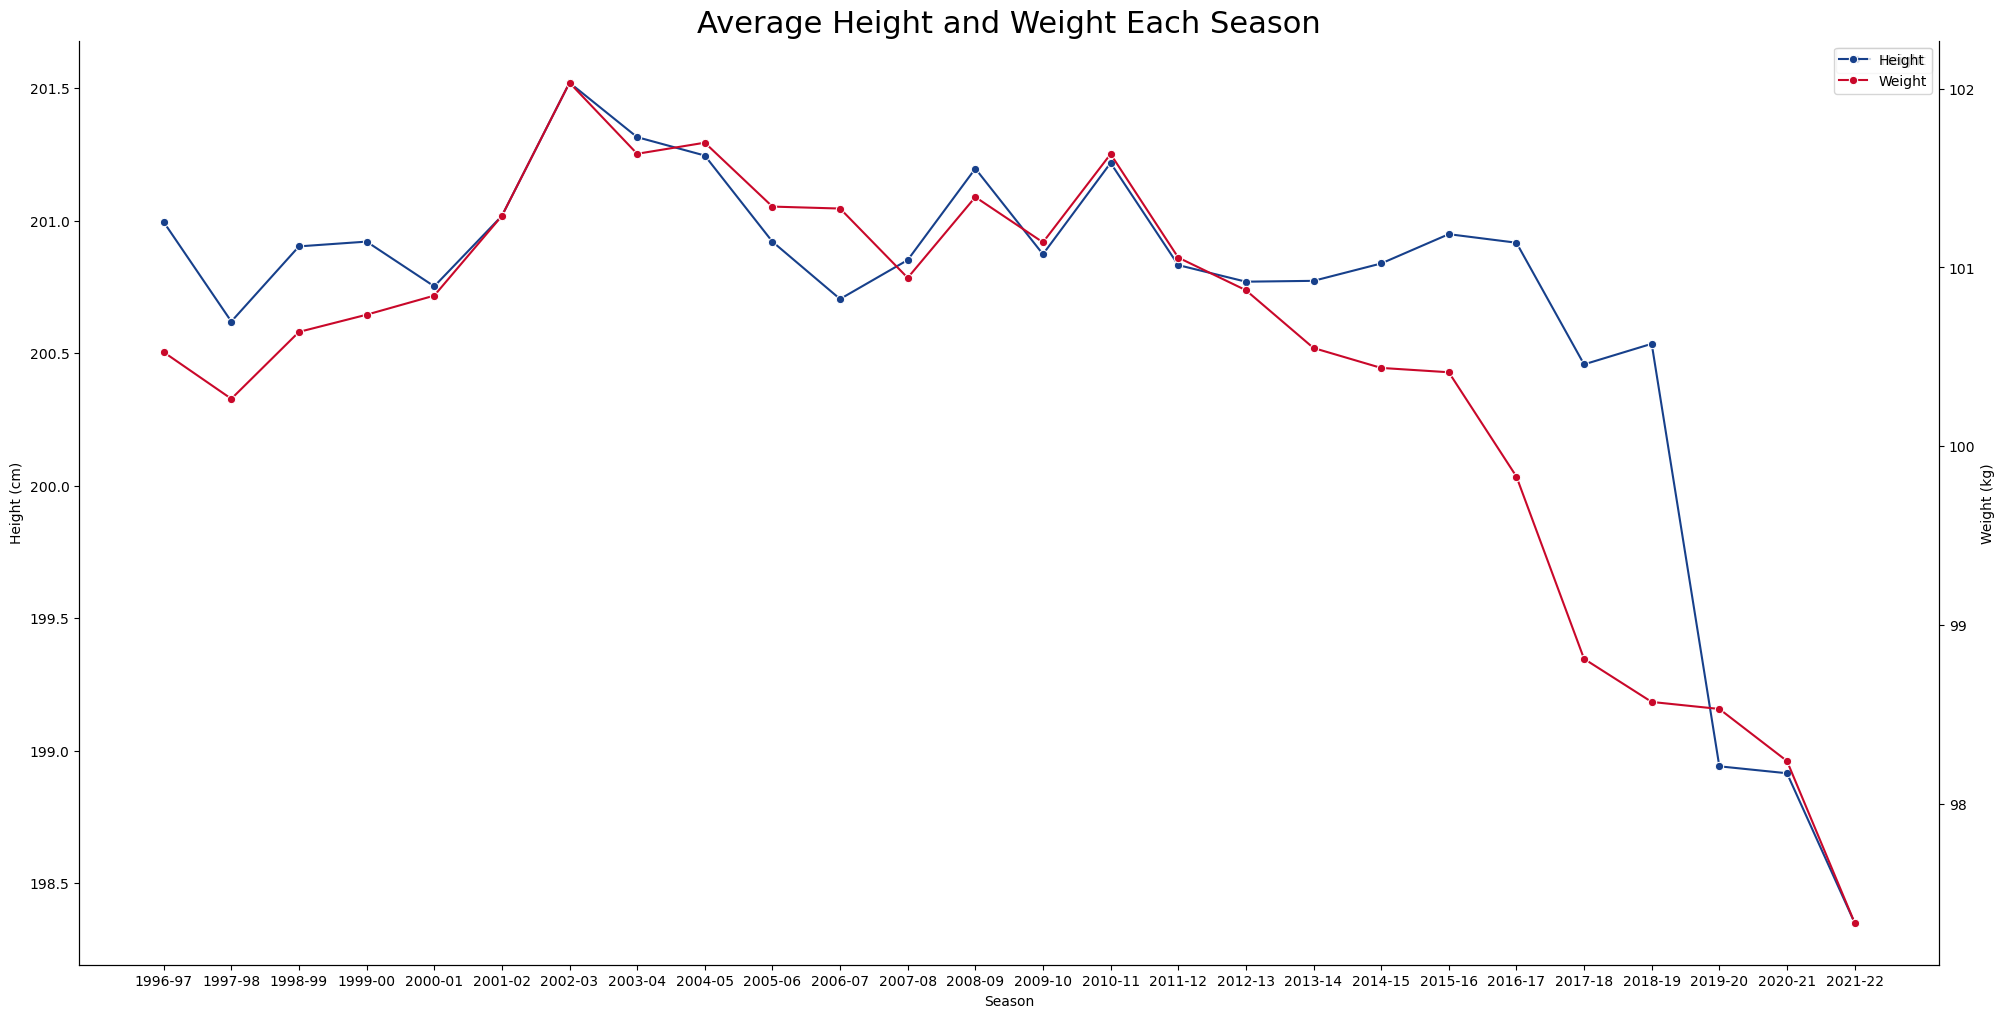

In [18]:
fig, ax = plt.subplots(figsize=(24, 12))
ax2 = ax.twinx()

sns.lineplot(x=df['season'], y='player_height', data=df, marker="o", ax=ax, errorbar=None, label='Height', color='#17408b')
sns.lineplot(x=df['season'], y='player_weight', data=df, marker="o", ax=ax2, errorbar=None, label='Weight', color='#c9082a')

plt.title('Average Height and Weight Each Season', fontsize=22)
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

In [38]:
df['bmi'] = df['player_weight'].values / (df['player_height'].values ** 2) * 10000

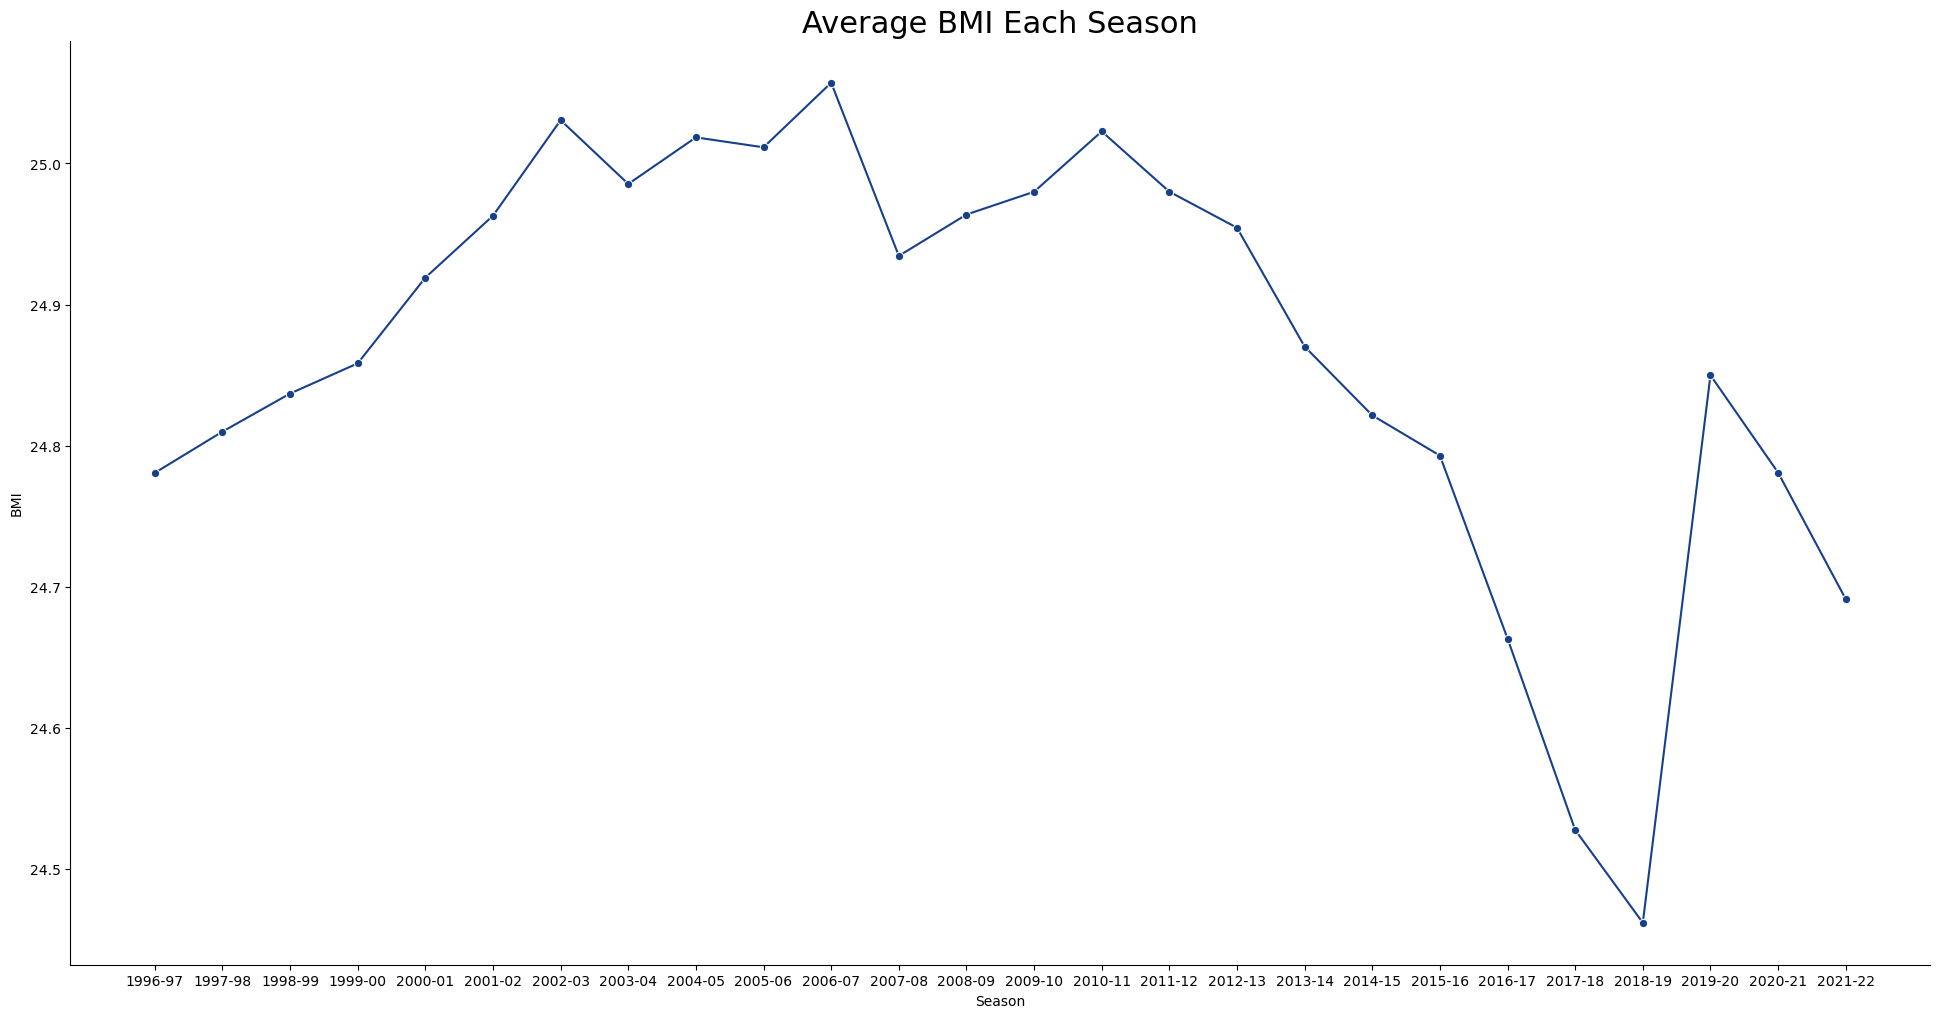

In [39]:
plt.figure(figsize=(24, 12))

sns.lineplot(x=df['season'], y='bmi', data=df, marker="o", errorbar=None, color='#17408b')

plt.title('Average BMI Each Season', fontsize=22)
plt.ylabel('BMI')
plt.xlabel('Season')
sns.despine()

plt.show()

In [40]:
bmi_exploration = df[df['season'] == '2018-19']
bmi_exploration[['player_name','bmi']].sort_values(by='bmi',ascending=False)[:10]

player_name        bmi
10170       Alan Williams  29.111451
10351       Deonte Burton  29.052438
10347  Guerschon Yabusele  28.562178
10203      Andre Drummond  28.473835
10576       Jared Terrell  28.372740
10257         P.J. Tucker  28.312279
10564       Jahlil Okafor  28.065608
10465   Marcus Derrickson  28.050662
10252         Tyler Davis  27.813259
10350      Derrick Favors  27.708698

In [41]:
bmi_exploration = df[df['season'] == '2019-20']
bmi_exploration[['player_name','bmi']].sort_values(by='bmi',ascending=False)[:10]

player_name        bmi
10799     Zion Williamson  32.819132
11035    Jarrell Brantley  29.645345
11101       Eric Paschall  29.467882
10941       Deonte Burton  29.213394
10976      Andre Drummond  29.172554
10855         P.J. Tucker  29.052438
10845        Paul Millsap  28.951888
10814  Wendell Carter Jr.  28.932881
10710        Jusuf Nurkic  28.895977
10989   Admiral Schofield  28.578113

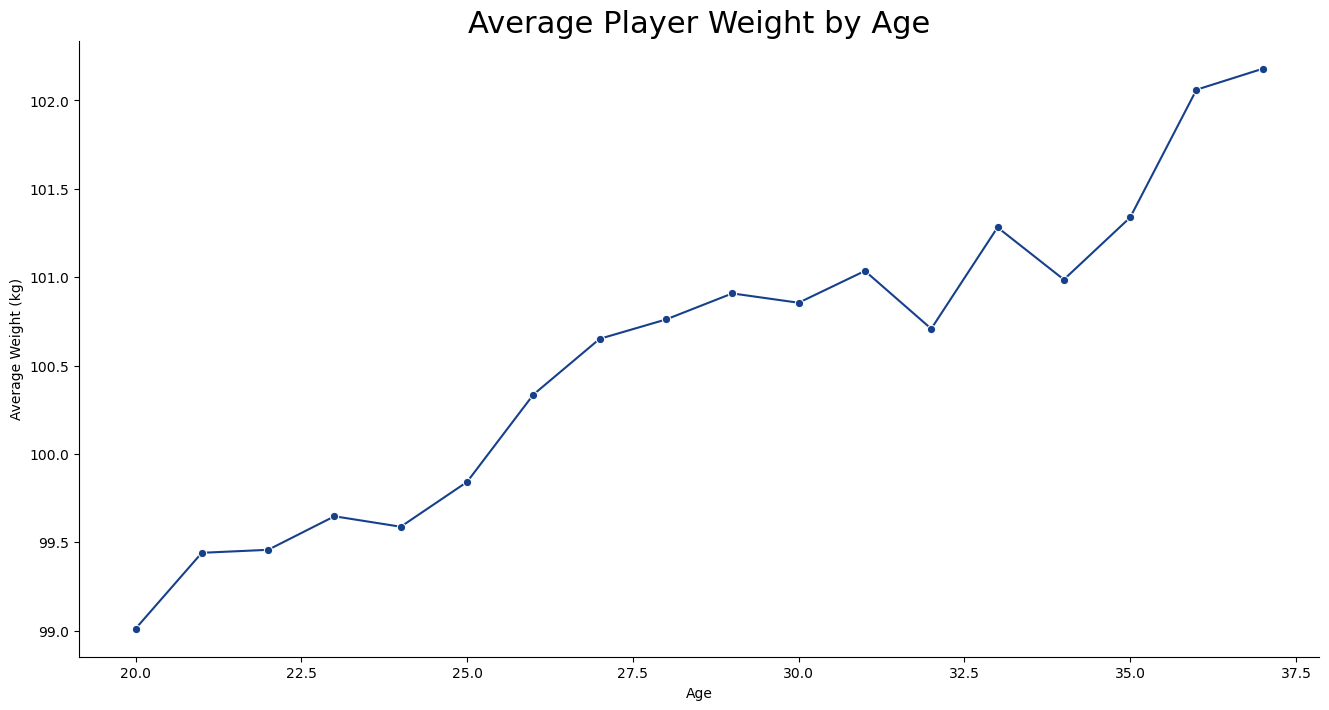

In [42]:
plt.figure(figsize=(16, 8))

w_by_age = df.groupby(['age'])['player_weight'].agg(['mean', 'count'])
w_by_age['outliers'] = np.where(w_by_age['count']<=100, 1, 0)
w_by_age = w_by_age.loc[w_by_age['outliers']==0]

sns.lineplot(x=w_by_age.index, y='mean', data=w_by_age, marker='o', color='#17408b')

plt.title('Average Player Weight by Age', fontsize=22)
plt.ylabel('Average Weight (kg)')
plt.xlabel('Age')
sns.despine()

plt.show()

In [43]:
first_season_drafted = df.query('start_year == draft_year')

h_w_by_draft_year = first_season_drafted.groupby('start_year')[['player_height', 'player_weight']].mean()

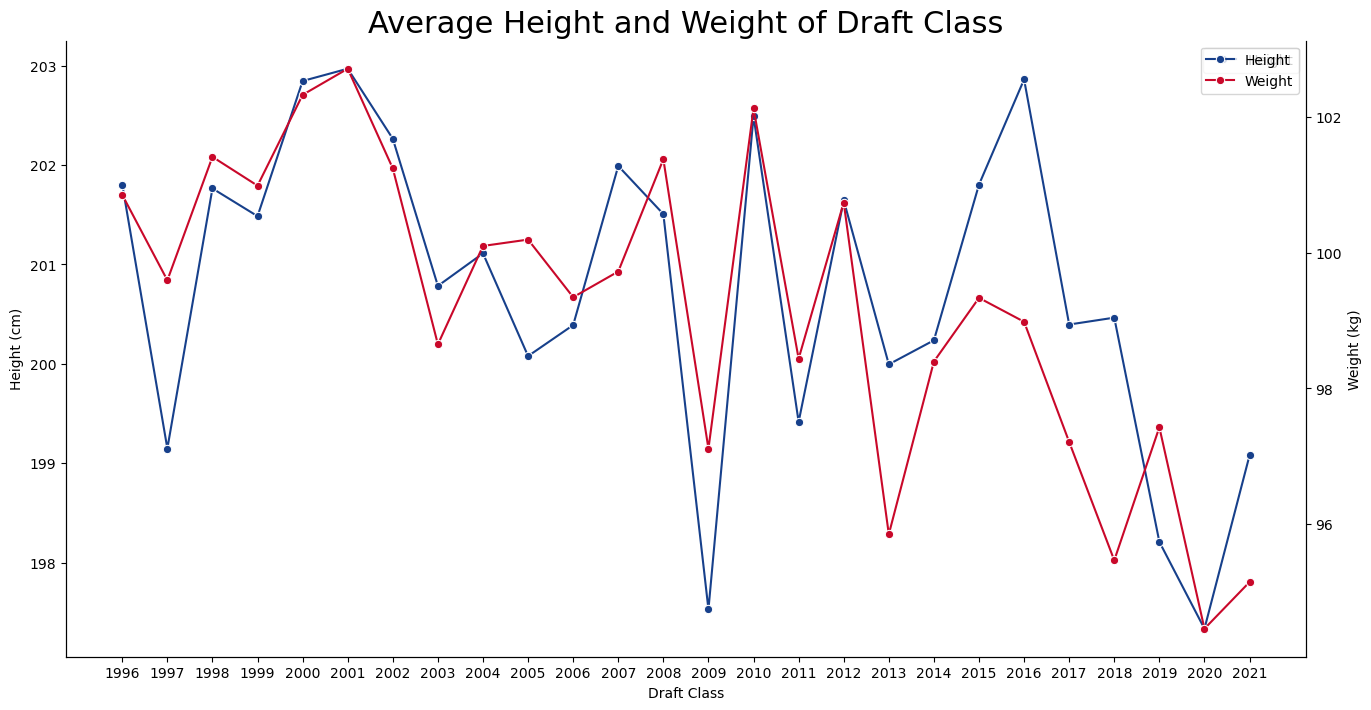

In [44]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

sns.lineplot(x=h_w_by_draft_year.index, y='player_height', data=h_w_by_draft_year, marker="o", ax=ax, errorbar=None, label='Height', color='#17408b')
sns.lineplot(x=h_w_by_draft_year.index, y='player_weight', data=h_w_by_draft_year, marker="o", ax=ax2, errorbar=None, label='Weight', color='#c9082a')

plt.title('Average Height and Weight of Draft Class', fontsize=22)
ax.xaxis.set_label_text('Draft Class')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

In [45]:
print(first_season_drafted)

       Unnamed: 0    player_name team_abbreviation   age  player_height  \
21             21  Erick Dampier               IND  21.0         210.82   
30             30   Derek Fisher               LAL  22.0         185.42   
68             68    Jamie Feick               SAS  22.0         203.20   
73             73   Jason Sasser               DAL  23.0         200.66   
77             77   Jeff McInnis               DEN  22.0         193.04   
...           ...            ...               ...   ...            ...   
12218       12218      Kai Jones               CHA  21.0         208.28   
12233       12233    Moses Moody               GSW  20.0         195.58   
12241       12241  Miles McBride               NYK  21.0         185.42   
12261       12261  Neemias Queta               SAC  22.0         213.36   
12279       12279     Luka Garza               DET  23.0         208.28   

       player_weight               college   country draft_year draft_round  \
21        120.201880

In [46]:
print(df['season'].unique())
print(df['draft_year'].unique())


['1996-97' '1997-98' '1998-99' '1999-00' '2000-01' '2001-02' '2002-03'
 '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09' '2009-10'
 '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16' '2016-17'
 '2017-18' '2018-19' '2019-20' '2020-21' '2021-22']
['1986' '1990' '1979' '1995' '1985' '1981' '1994' '1992' '1991'
 'Undrafted' '1983' '1988' '1996' '1993' '1989' '1987' '1982' '1984'
 '1980' '1976' '1978' '1997' '1998' '1999' '2000' '2001' '2002' '2003'
 '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '1963' '2012'
 '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021']


In [47]:
df['start_year'] = df['season'].str.split('-').str[0]

In [48]:
print(df['start_year'].unique())

['1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020' '2021']


In [49]:
bmi_draft = h_w_by_draft_year['player_weight'] / (h_w_by_draft_year['player_height'] ** 2) * 10000
bmi_draft = pd.DataFrame(bmi_draft, columns=['bmi'])
bmi_draft = bmi_draft.rename(columns={'bmi': 'bmi_draft'})
print(bmi_draft.head())

            bmi_draft
start_year           
1996        24.765510
1997        25.112439
1998        24.912826
1999        24.877142
2000        24.870375


In [50]:
df_merged = df.join(bmi_draft, on='start_year')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

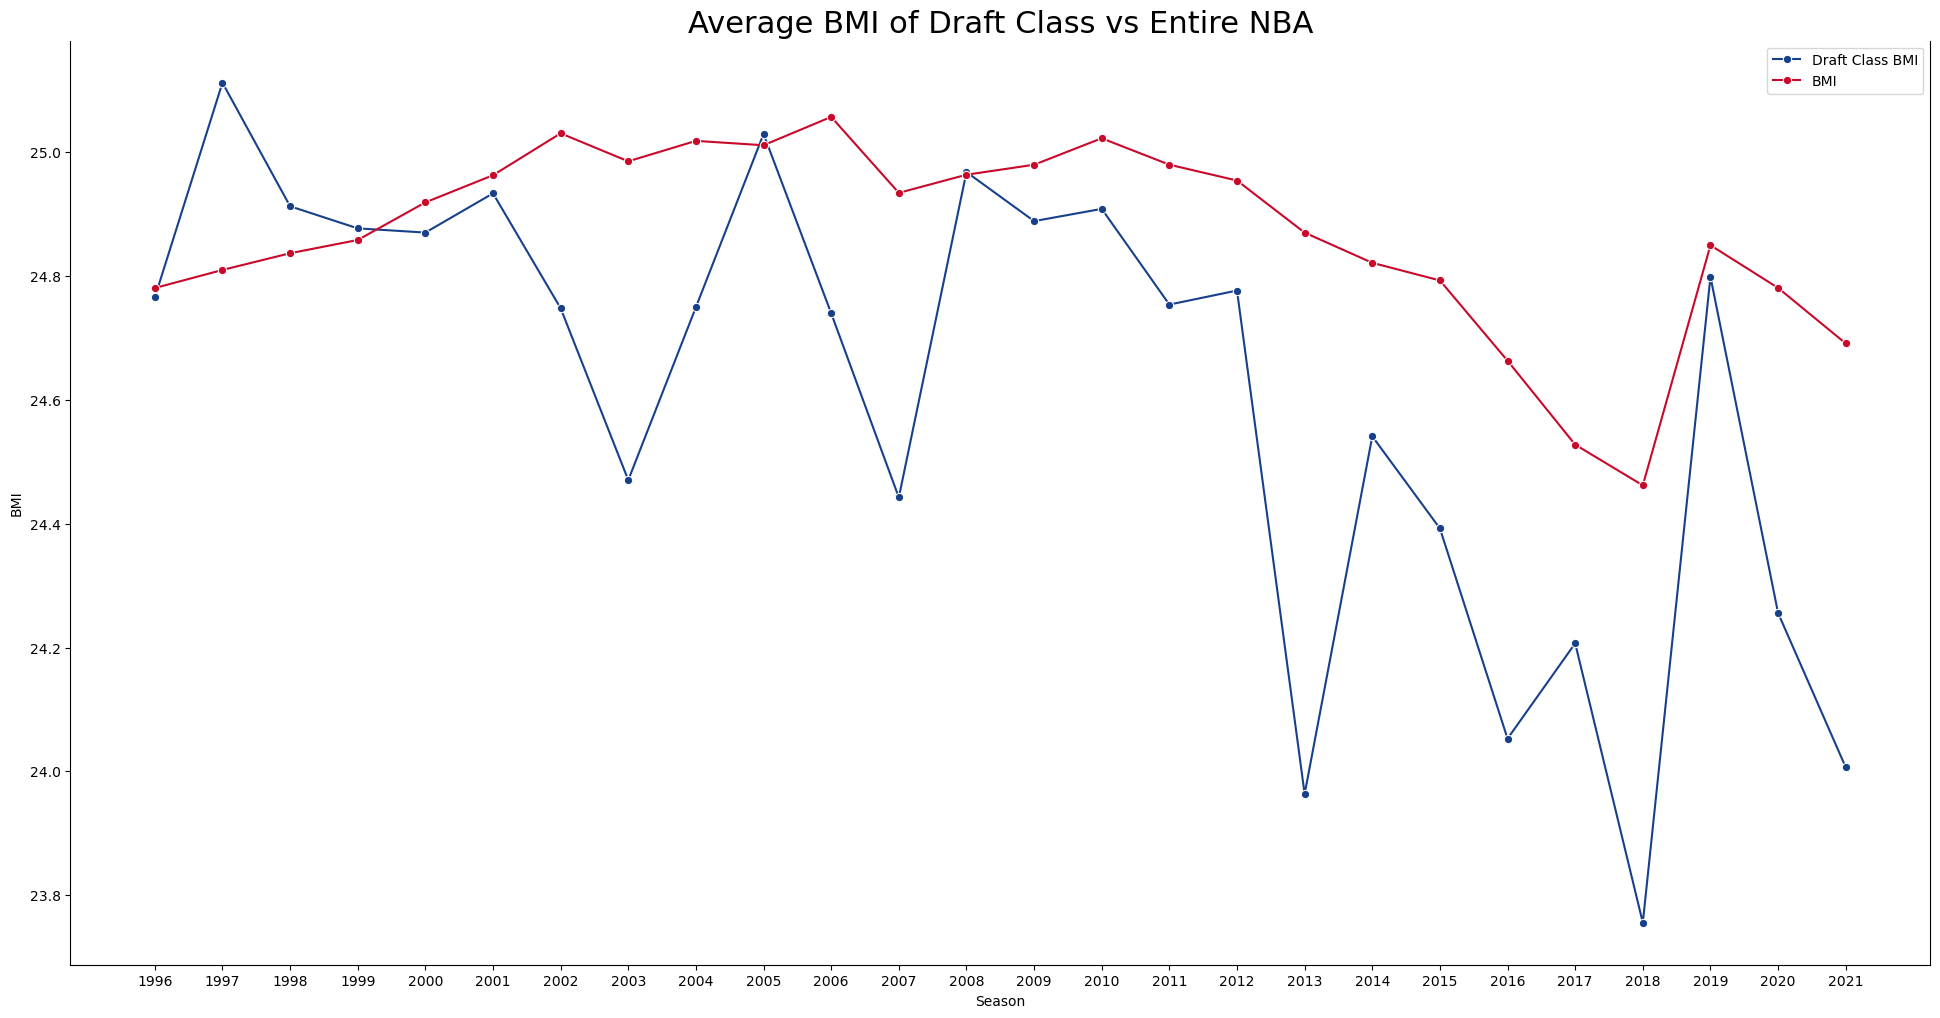

In [52]:
fig, ax = plt.subplots(figsize=(24, 12))
sns.lineplot(x=bmi_draft.index.astype(str), y='bmi_draft', data=bmi_draft, marker="o", ax=ax, color='#17408b', errorbar=None, label='Draft Class BMI')
sns.lineplot(x=df['start_year'].astype(str), y='bmi', data=df, marker="o", ax=ax, color='#c9082a', errorbar=None, label='BMI')

plt.title('Average BMI of Draft Class vs Entire NBA', fontsize=22)
ax.xaxis.set_label_text('Season')
ax.set_xlabel('Season')
ax.set_ylabel('BMI')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc=0)

ax.spines['top'].set_visible(False)
plt.show()

In [53]:
df_corr = df[['gp', 'player_weight', 'player_height', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct']]
print(df_corr.head())

C:\Users\Tien\AppData\Local\Temp\ipykernel_4228\1928163937.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Unnamed: 0       age  player_height  player_weight        gp  \
Unnamed: 0       1.000000 -0.132799      -0.056464      -0.072682 -0.083579   
age             -0.132799  1.000000      -0.008954       0.058544  0.055218   
player_height   -0.056464 -0.008954       1.000000       0.825421  0.002202   
player_weight   -0.072682  0.058544       0.825421       1.000000  0.019652   
gp              -0.083579  0.055218       0.002202       0.019652  1.000000   
pts              0.039607  0.008118      -0.056564      -0.026664  0.539066   
reb             -0.001822  0.035623       0.423275       0.437930  0.470948   
ast              0.021699  0.090209      -0.449033      -0.378784  0.385836   
net_rating      -0.004113  0.091746      -0.002877       0.004043  0.253262   
oreb_pct        -0.162082 -0.057147       0.589485       0.600643 -0.016396   
dreb_pct         0.002365  0.018330       0.614963       0.607045  0.067266   
usg_pct         -0.049260 -0.119416      -0.104714      -0.067385  0.146806   
ts_pct           0.139735  0.025175       0.072154       0.068142  0.375816   
ast_pct         -0.002232  0.066766      -0.614631      -0.529440  0.133982   
bmi             -0.045892  0.108083       0.181930       0.702552  0.032472   

                    pts       reb       ast  net_rating  oreb_pct  dreb_pct  \
Unnamed: 0     0.039607 -0.001822  0.021699   -0.004113 -0.162082  0.002365   
age            0.008118  0.035623  0.090209    0.091746 -0.057147  0.018330   
player_height -0.056564  0.423275 -0.449033   -0.002877  0.589485  0.614963   
player_weight -0.026664  0.437930 -0.378784    0.004043  0.600643  0.607045   
gp             0.539066  0.470948  0.385836    0.253262 -0.016396  0.067266   
pts            1.000000  0.624889  0.660949    0.218366 -0.123674  0.054804   
reb            0.624889  1.000000  0.241018    0.190940  0.407976  0.612226   
ast            0.660949  0.241018  1.000000    0.165098 -0.340600 -0.198130   
net_rating     0.218366  0.190940  0.165098    1.000000  0.060166  0.051433   
oreb_pct      -0.123674  0.407976 -0.340600    0.060166  1.000000  0.556096   
dreb_pct       0.054804  0.612226 -0.198130    0.051433  0.556096  1.000000   
usg_pct        0.638853  0.230552  0.392533    0.018866 -0.099069 -0.012817   
ts_pct         0.376571  0.314569  0.176083    0.316474  0.061805  0.107036   
ast_pct        0.332815 -0.069771  0.802527    0.066176 -0.428527 -0.325083   
bmi            0.025392  0.227187 -0.100544    0.010958  0.298090  0.278891   

                usg_pct    ts_pct   ast_pct       bmi  
Unnamed: 0    -0.049260  0.139735 -0.002232 -0.045892  
age           -0.119416  0.025175  0.066766  0.108083  
player_height -0.104714  0.072154 -0.614631  0.181930  
player_weight -0.067385  0.068142 -0.529440  0.702552  
gp             0.146806  0.375816  0.133982  0.032472  
pts            0.638853  0.376571  0.332815  0.025392  
reb            0.230552  0.314569 -0.069771  0.227187  
ast            0.392533  0.176083  0.802527 -0.100544  
net_rating     0.018866  0.316474  0.066176  0.010958  
oreb_pct      -0.099069  0.061805 -0.428527  0.298090  
dreb_pct      -0.012817  0.107036 -0.325083  0.278891  
usg_pct        1.000000  0.123368  0.335210  0.006621  
ts_pct         0.123368  1.000000  0.025034  0.029945  
ast_pct        0.335210  0.025034  1.000000 -0.162243  
bmi            0.006621  0.029945 -0.162243  1.000000

In [59]:
df_corr.corr(method='pearson')

gp  player_weight  player_height       pts       reb  \
gp             1.000000       0.019652       0.002202  0.539066  0.470948   
player_weight  0.019652       1.000000       0.825421 -0.026664  0.437930   
player_height  0.002202       0.825421       1.000000 -0.056564  0.423275   
pts            0.539066      -0.026664      -0.056564  1.000000  0.624889   
reb            0.470948       0.437930       0.423275  0.624889  1.000000   
ast            0.385836      -0.378784      -0.449033  0.660949  0.241018   
net_rating     0.253262       0.004043      -0.002877  0.218366  0.190940   
oreb_pct      -0.016396       0.600643       0.589485 -0.123674  0.407976   
dreb_pct       0.067266       0.607045       0.614963  0.054804  0.612226   
usg_pct        0.146806      -0.067385      -0.104714  0.638853  0.230552   
ts_pct         0.375816       0.068142       0.072154  0.376571  0.314569   

                    ast  net_rating  oreb_pct  dreb_pct   usg_pct    ts_pct  
gp             0.385836    0.253262 -0.016396  0.067266  0.146806  0.375816  
player_weight -0.378784    0.004043  0.600643  0.607045 -0.067385  0.068142  
player_height -0.449033   -0.002877  0.589485  0.614963 -0.104714  0.072154  
pts            0.660949    0.218366 -0.123674  0.054804  0.638853  0.376571  
reb            0.241018    0.190940  0.407976  0.612226  0.230552  0.314569  
ast            1.000000    0.165098 -0.340600 -0.198130  0.392533  0.176083  
net_rating     0.165098    1.000000  0.060166  0.051433  0.018866  0.316474  
oreb_pct      -0.340600    0.060166  1.000000  0.556096 -0.099069  0.061805  
dreb_pct      -0.198130    0.051433  0.556096  1.000000 -0.012817  0.107036  
usg_pct        0.392533    0.018866 -0.099069 -0.012817  1.000000  0.123368  
ts_pct         0.176083    0.316474  0.061805  0.107036  0.123368  1.000000

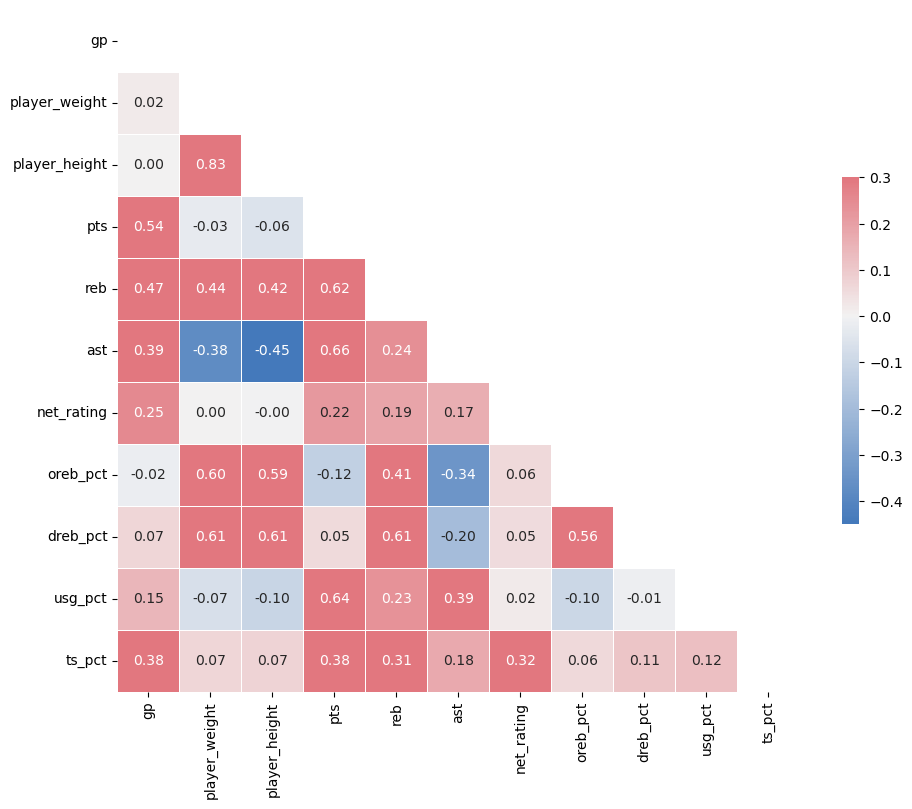

In [66]:
corr = df_corr.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()
